# <center> Towards Poverty Alleviation: Education or Employment -- What Comes First? </center>

<b> Exploratory Data Analysis (EDA) </b> was conducted to assess how factors such as <b> employment rate </b> and <b> enrollment rate </b> correlate to the poverty threshold in the Philippines, aiming to determine which factor has the most significant impact on the country's poverty levels.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

<b>______________________________________________________________________________________________________________________________</b>

## <center> Poverty Threshold </center>

### Initial Data Exploration

In [2]:
# Read the Excel file into a DataFrame
df_poverty = pd.read_excel("Philippines_Poverty_Threshold.xlsx")

In [3]:
df_poverty.head()

,Province,Region,2018 First Semester Poverty Threshold (in PhP),2021 First Semester Poverty Threshold (in PhP),2023 First Semester Poverty Threshold (in PhP)
0,Manila,NCR,14102,16625,18704
1,Mandaluyong,NCR,14102,16625,18704
2,Marikina,NCR,14102,16625,18704
3,Pasig,NCR,14102,16625,18704
4,Quezon City,NCR,14102,16625,18704


In [4]:
df_poverty.tail()

,Province,Region,2018 First Semester Poverty Threshold (in PhP),2021 First Semester Poverty Threshold (in PhP),2023 First Semester Poverty Threshold (in PhP)
95,Lanao del Sur,BARMM,14786,14627,16481
96,Maguindanao,BARMM,12765,12844,13735
97,Sulu,BARMM,13929,15363,14755
98,Tawi-tawi,BARMM,9881,13333,15642
99,Cotabato City,BARMM,14722,16749,18934


In [5]:
df_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Province                                         100 non-null    object
 1   Region                                           100 non-null    object
 2   2018 First Semester Poverty Threshold (in PhP)   100 non-null    int64 
 3    2021 First Semester Poverty Threshold (in PhP)  100 non-null    int64 
 4   2023 First Semester Poverty Threshold (in PhP)   100 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


In [6]:
df_poverty.columns = ['Province', 'Region', 'poverty_threshold_2018',
                        'poverty_threshold_2021', 'poverty_threshold_2023']

# Display the updated column names
print(df_poverty.columns)

Index(['Province', 'Region', 'poverty_threshold_2018',
       'poverty_threshold_2021', 'poverty_threshold_2023'],
      dtype='object')


In [7]:
df_poverty.describe().T

,count,mean,std,min,25%,50%,75%,max
poverty_threshold_2018,100.0,12773.78,1306.213122,9881.0,11885.5,12623.5,13988.75,19333.0
poverty_threshold_2021,100.0,14547.14,1570.061724,12033.0,13372.5,14144.0,16317.00,17907.0
poverty_threshold_2023,100.0,16479.68,1795.470631,12907.0,14875.0,16311.0,18074.25,20680.0


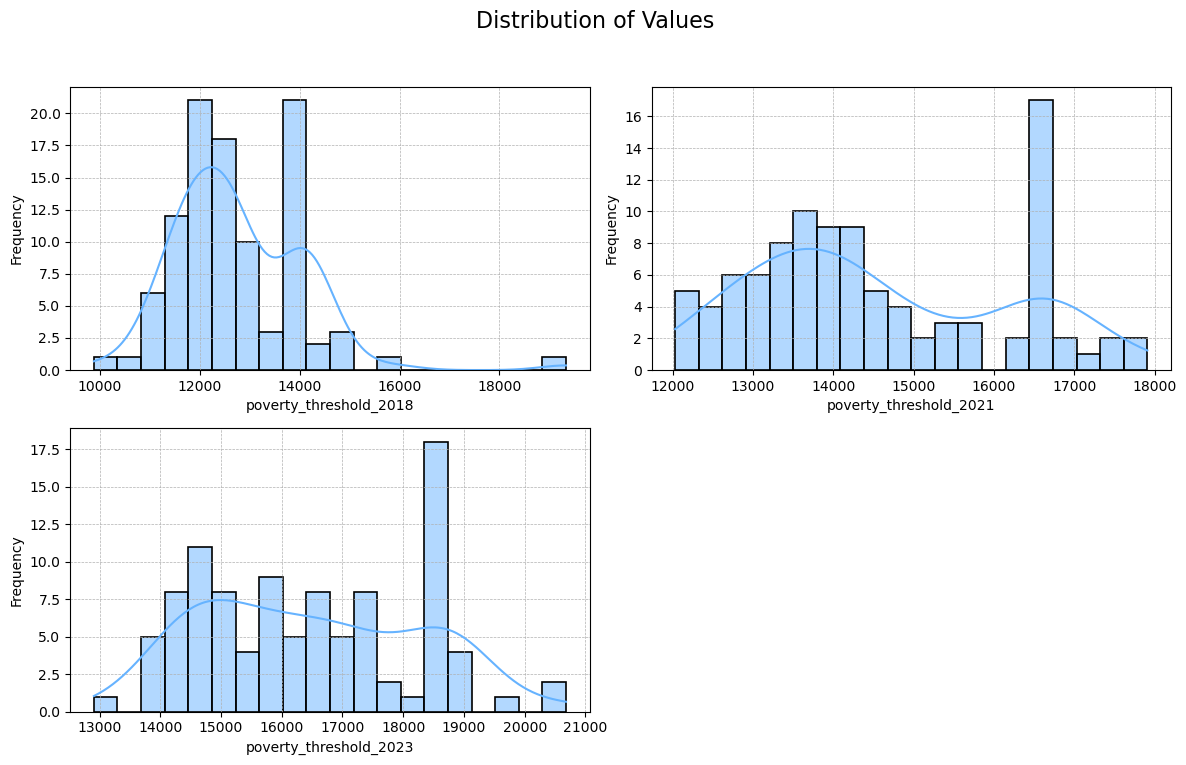

In [8]:
# Define the numerical variables
poverty_numerical_vars = ['poverty_threshold_2018', 'poverty_threshold_2021', 'poverty_threshold_2023']

# Create subplots for each variable
num_plots = len(poverty_numerical_vars)
cols = 2  # Number of columns in subplot grid
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Flatten axes array to iterate over it
axes = axes.flatten()

# Define a lighter blue color
color = '#66b3ff'

# Iterate over numerical variables and plot histograms with KDE curves
for i, var in enumerate(poverty_numerical_vars):
    ax = axes[i]
    sns.histplot(df_poverty[var].dropna(), bins=20, kde=True, color=color, edgecolor='black', linewidth=1.2, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', linewidth=0.5)  # Add grid lines with enhanced visibility

# Hide empty subplots
for j in range(num_plots, rows * cols):
    axes[j].axis('off')

# Add a single title to the uppermost subplot
plt.suptitle("Distribution of Values", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

### Data Cleaning

#### Handling Missing Values

In [9]:
poverty_missing_values = df_poverty.isnull().sum()
print("Missing Values:")
print(poverty_missing_values)

Missing Values:
Province                  0
Region                    0
poverty_threshold_2018    0
poverty_threshold_2021    0
poverty_threshold_2023    0
dtype: int64


#### Handling Duplicates

In [10]:
#Checking for duplicates in the columns
poverty_duplicate_columns = df_poverty.columns[df_poverty.columns.duplicated()]

# Print duplicate columns, if any
if len(poverty_duplicate_columns) > 0:
    print("Duplicate Columns:", poverty_duplicate_columns)
else:
    print("No duplicate columns found.")

No duplicate columns found.


In [11]:
# Check for duplicated values in the dataset
poverty_num_duplicated_values = df_poverty.duplicated().sum()

# Print the number of duplicated values
print("Number of Duplicated Values:", poverty_num_duplicated_values)

Number of Duplicated Values: 0


#### Handling Outliers

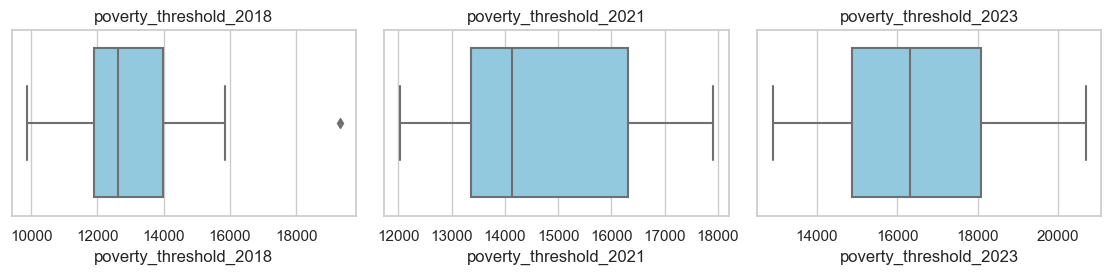

In [12]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select numerical columns for visualization
poverty_numerical_cols = ['poverty_threshold_2018',
       'poverty_threshold_2021', 'poverty_threshold_2023']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(poverty_numerical_cols, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_poverty[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

---

### Feature Engineering

In [13]:
# Selecting only numerical columns
poverty_numerical_cols = ['poverty_threshold_2018',
       'poverty_threshold_2021', 'poverty_threshold_2023']

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_poverty_scaled = scaler.fit_transform(df_poverty[poverty_numerical_cols])

# Convert the scaled array back to a DataFrame
df_poverty_scaled = pd.DataFrame(df_poverty_scaled, columns=poverty_numerical_cols)

In [14]:
df_poverty_scaled.head()

,poverty_threshold_2018,poverty_threshold_2021,poverty_threshold_2023
0,0.446572,0.78175,0.745787
1,0.446572,0.78175,0.745787
2,0.446572,0.78175,0.745787
3,0.446572,0.78175,0.745787
4,0.446572,0.78175,0.745787


In [15]:
df_poverty_scaled.tail()

,poverty_threshold_2018,poverty_threshold_2021,poverty_threshold_2023
95,0.518938,0.441607,0.459797
96,0.305121,0.138066,0.106523
97,0.428269,0.566905,0.237746
98,0.000000,0.221314,0.351859
99,0.512167,0.802860,0.775376


In [16]:
df_poverty_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
poverty_threshold_2018,100.0,0.306050,0.138194,0.0,0.212072,0.290150,0.434591,1.0
poverty_threshold_2021,100.0,0.428012,0.267290,0.0,0.228039,0.359380,0.729316,1.0
poverty_threshold_2023,100.0,0.459627,0.230988,0.0,0.253184,0.437926,0.664769,1.0


---

### Exploratory Data Analysis (EDA)

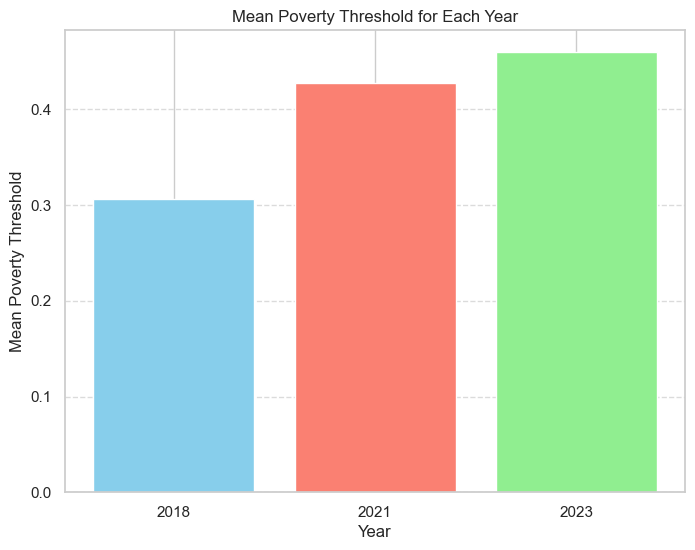

In [17]:
# Years
years = ['2018', '2021', '2023']

# Mean poverty threshold values
mean_thresholds = [0.306050, 0.428012, 0.459627]

# Colors for each year
colors = ['skyblue', 'salmon', 'lightgreen']

# Create bar plot with custom colors
plt.figure(figsize=(8, 6))
plt.bar(years, mean_thresholds, color=colors)
plt.title('Mean Poverty Threshold for Each Year')
plt.xlabel('Year')
plt.ylabel('Mean Poverty Threshold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> The graph shows that the mean poverty threshold in the Philippines has increased over the given years. It indicates that the cost of living or the income requirement to meet basic needs has grown through the years.

<b>______________________________________________________________________________________________________________________________</b>

## <center> Employment Rate </center>

### Initial Data Exploration

In [18]:
# Read the Excel file into a DataFrame
df_employment_rate = pd.read_excel("Philippines_Employment_Rate.xlsx")

In [19]:
df_employment_rate.head()

,Quarter,2018 Employment Rate,2021 Employment Rate,2023 Employment Rate
0,1st,94.7,91.2,95.2
1,2nd,94.5,91.3,95.5
2,3rd,94.6,92.8,95.2
3,4th,94.9,92.6,95.8


In [20]:
df_employment_rate.tail()

,Quarter,2018 Employment Rate,2021 Employment Rate,2023 Employment Rate
0,1st,94.7,91.2,95.2
1,2nd,94.5,91.3,95.5
2,3rd,94.6,92.8,95.2
3,4th,94.9,92.6,95.8


In [21]:
df_employment_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Quarter               4 non-null      object 
 1   2018 Employment Rate  4 non-null      float64
 2   2021 Employment Rate  4 non-null      float64
 3   2023 Employment Rate  4 non-null      float64
dtypes: float64(3), object(1)
memory usage: 260.0+ bytes


In [22]:
df_employment_rate.describe().T

,count,mean,std,min,25%,50%,75%,max
2018 Employment Rate,4.0,94.675,0.170783,94.5,94.575,94.65,94.750,94.9
2021 Employment Rate,4.0,91.975,0.842120,91.2,91.275,91.95,92.650,92.8
2023 Employment Rate,4.0,95.425,0.287228,95.2,95.200,95.35,95.575,95.8


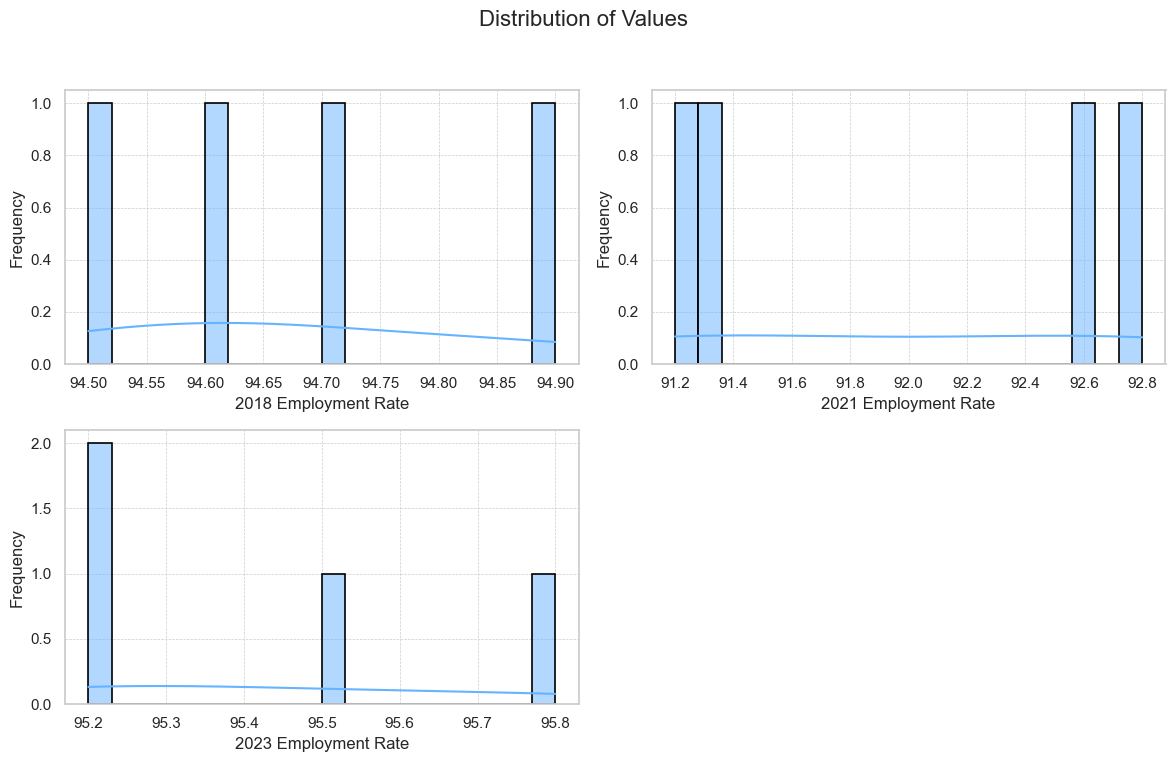

In [23]:
# Define the numerical variables
employment_rate_numerical_vars = ['2018 Employment Rate', '2021 Employment Rate', '2023 Employment Rate']

# Create subplots for each variable
num_plots = len(employment_rate_numerical_vars)
cols = 2  # Number of columns in subplot grid
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Flatten axes array to iterate over it
axes = axes.flatten()

# Define a lighter blue color
color = '#66b3ff'

# Iterate over numerical variables and plot histograms with KDE curves
for i, var in enumerate(employment_rate_numerical_vars):
    ax = axes[i]
    sns.histplot(df_employment_rate[var].dropna(), bins=20, kde=True, color=color, edgecolor='black', linewidth=1.2, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', linewidth=0.5)  # Add grid lines with enhanced visibility

# Hide empty subplots
for j in range(num_plots, rows * cols):
    axes[j].axis('off')

# Add a single title to the uppermost subplot
plt.suptitle("Distribution of Values", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

### Data Cleaning

#### Handling Missing Values

In [24]:
employment_rate_missing_values = df_employment_rate.isnull().sum()
print("Missing Values:")
print(employment_rate_missing_values)

Missing Values:
Quarter                 0
2018 Employment Rate    0
2021 Employment Rate    0
2023 Employment Rate    0
dtype: int64


#### Handling Duplicates

In [25]:
#Checking for duplicates in the columns
employment_rate_duplicate_columns = df_employment_rate.columns[df_employment_rate.columns.duplicated()]

# Print duplicate columns, if any
if len(employment_rate_duplicate_columns) > 0:
    print("Duplicate Columns:", employment_rate_duplicate_columns)
else:
    print("No duplicate columns found.")

No duplicate columns found.


#### Handling Outliers

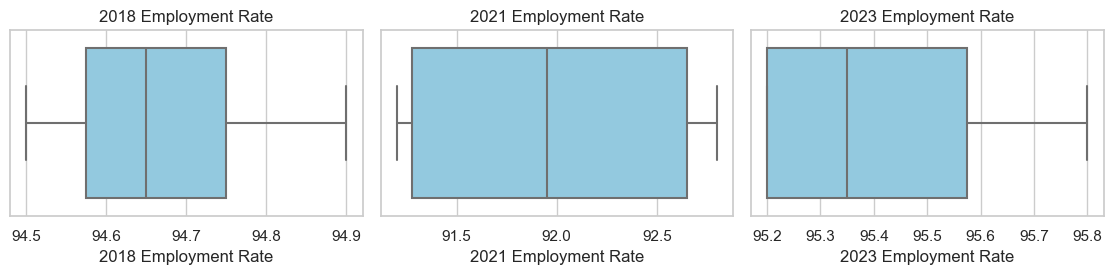

In [26]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select numerical columns for visualization
employment_rate_numerical_cols = ['2018 Employment Rate', '2021 Employment Rate', '2023 Employment Rate']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(employment_rate_numerical_cols, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_employment_rate[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

---

### Feature Engineering

In [27]:
# Selecting only numerical columns
employment_rate_numerical_cols = ['2018 Employment Rate', '2021 Employment Rate', '2023 Employment Rate']

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_employment_rate_scaled = scaler.fit_transform(df_employment_rate[employment_rate_numerical_cols])

# Convert the scaled array back to a DataFrame
df_employment_rate_scaled = pd.DataFrame(df_employment_rate_scaled, columns=employment_rate_numerical_cols)

In [28]:
df_employment_rate_scaled.head()

,2018 Employment Rate,2021 Employment Rate,2023 Employment Rate
0,0.50,0.0000,0.0
1,0.00,0.0625,0.5
2,0.25,1.0000,0.0
3,1.00,0.8750,1.0


In [29]:
df_employment_rate_scaled.tail()

,2018 Employment Rate,2021 Employment Rate,2023 Employment Rate
0,0.50,0.0000,0.0
1,0.00,0.0625,0.5
2,0.25,1.0000,0.0
3,1.00,0.8750,1.0


In [30]:
df_employment_rate_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
2018 Employment Rate,4.0,0.437500,0.426956,0.0,0.187500,0.37500,0.62500,1.0
2021 Employment Rate,4.0,0.484375,0.526325,0.0,0.046875,0.46875,0.90625,1.0
2023 Employment Rate,4.0,0.375000,0.478714,0.0,0.000000,0.25000,0.62500,1.0


### Exploratory Data Analysis (EDA)

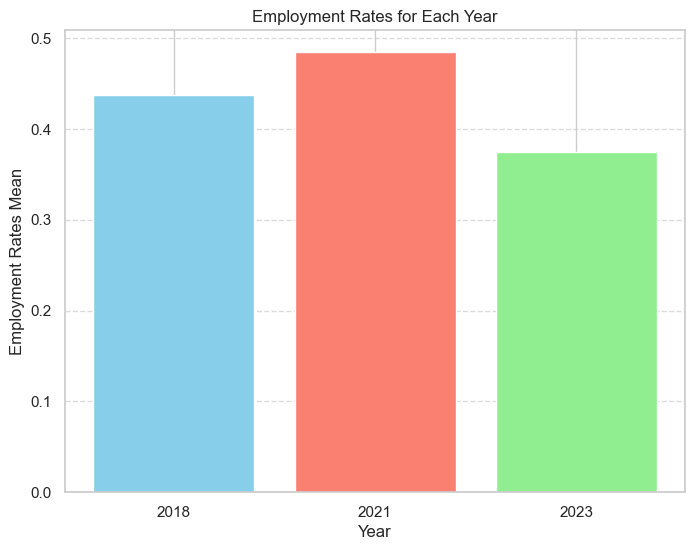

In [31]:
# Years
employment_rate_years = ['2018', '2021', '2023']

# Employment Rates Mean
employment_rate_mean = [0.437500, 0.484375, 0.375000]

# Colors for each year
colors = ['skyblue', 'salmon', 'lightgreen']

# Create bar plot with custom colors
plt.figure(figsize=(8, 6))
plt.bar(employment_rate_years, employment_rate_mean, color=colors)
plt.title('Employment Rates for Each Year')
plt.xlabel('Year')
plt.ylabel('Employment Rates Mean')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> The graph indicates that the highest employment rate was recorded in 2021, followed by 2018, and then 2023. This pattern suggests variability in employment rate over the years.

In [32]:
# Summary statistics data
data_poverty = {
    'poverty_threshold_2018': [0.306050],
    'poverty_threshold_2021': [0.428012],
    'poverty_threshold_2023': [0.459627]
}

data_employment = {
    'employment_rate_2018': [0.437500],
    'employment_rate_2021': [0.484375],
    'employment_rate_2023': [0.375000]
}

# Creating DataFrames
df_poverty_scaled = pd.DataFrame(data_poverty)
df_employment_rate_scaled = pd.DataFrame(data_employment)

# Calculate averages for the correct years
avg_employment_2018 = df_employment_rate_scaled['employment_rate_2018'].mean()
avg_employment_2021 = df_employment_rate_scaled['employment_rate_2021'].mean()
avg_employment_2023 = df_employment_rate_scaled['employment_rate_2023'].mean()

# Create a new DataFrame including 2023
poverty_employment_combined_df = pd.DataFrame({
    'Year': ['2018', '2021', '2023'],
    'Poverty_Threshold': [
        df_poverty_scaled['poverty_threshold_2018'].mean(),
        df_poverty_scaled['poverty_threshold_2021'].mean(),
        df_poverty_scaled['poverty_threshold_2023'].mean()
    ],
    'Employment_Rate': [
        avg_employment_2018,
        avg_employment_2021,
        avg_employment_2023
    ]
})

# Display the combined dataframe
print(poverty_employment_combined_df)

   Year  Poverty_Threshold  Employment_Rate
0  2018           0.306050         0.437500
1  2021           0.428012         0.484375
2  2023           0.459627         0.375000


In [33]:
# Calculate the correlation matrix
poverty_employment_correlation_matrix = poverty_employment_combined_df[['Poverty_Threshold', 'Employment_Rate']].corr()

# Display the correlation matrix
print(poverty_employment_correlation_matrix)

                   Poverty_Threshold  Employment_Rate
Poverty_Threshold           1.000000        -0.274885
Employment_Rate            -0.274885         1.000000


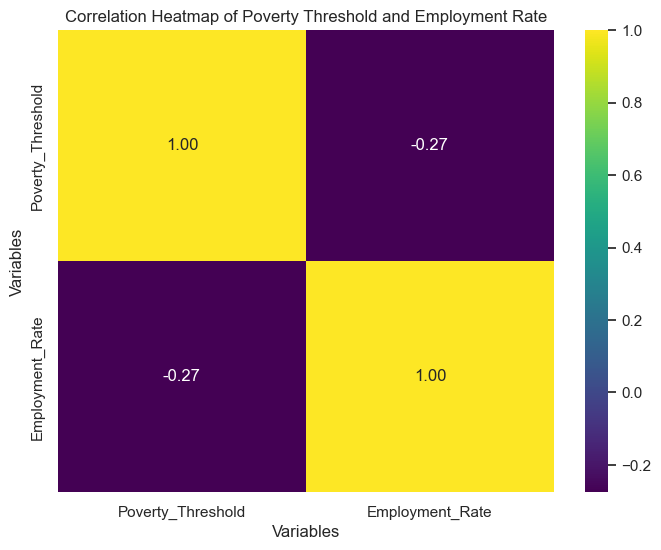

In [57]:
# Displaying correlation through a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(poverty_employment_correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Poverty Threshold and Employment Rate')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

> The value of -0.275 suggests a weak negative correlation between poverty threshold and employment rate. This means that there is some tendency for the poverty threshold to decrease as employment rates increase, and the poverty threshold to increase as employment rates decrease. 

<b>______________________________________________________________________________________________________________________________</b>

## <center> Enrollment Rate </center>

### Initial Data Exploration

In [35]:
# Read the Excel file into a DataFrame
df_enrollment_rate = pd.read_excel("Net_Enrollment_Rate_in_Public_and_Private_Elementary_Schools.xlsx")

In [36]:
df_enrollment_rate.head()

,Region,2017-2018,2018-2019,2019-2020,2020-2021
0,NCR,92.83,92.11,89.91,81.15
1,CAR,94.37,92.24,91.40,87.53
2,I - Ilocos Region,92.50,90.48,89.99,86.22
3,II - Cagayan Valley,98.45,96.86,97.17,93.63
4,III - Central Luzon,97.91,98.77,100.03,95.41


In [37]:
df_enrollment_rate.tail()

,Region,2017-2018,2018-2019,2019-2020,2020-2021
12,X - Northern Mindanao,96.43,97.73,99.23,97.08
13,XI - Davao Region,96.88,95.61,93.87,86.27
14,XII - SOCCSKSARGEN,91.86,92.04,92.24,88.73
15,XIII - Caraga,95.89,94.74,94.84,92.04
16,BARMM,72.63,73.24,71.51,69.17


In [38]:
df_enrollment_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     17 non-null     object 
 1   2017-2018  17 non-null     float64
 2   2018-2019  17 non-null     float64
 3   2019-2020  17 non-null     float64
 4   2020-2021  17 non-null     float64
dtypes: float64(4), object(1)
memory usage: 812.0+ bytes


In [39]:
df_enrollment_rate.columns = ['Region', 'SY 2017-2018', 'SY 2018-2019',
                        'SY 2019-2020', 'SY 2020-2021']

# Display the updated column names
print(df_enrollment_rate.columns)

Index(['Region', 'SY 2017-2018', 'SY 2018-2019', 'SY 2019-2020',
       'SY 2020-2021'],
      dtype='object')


In [40]:
df_enrollment_rate.describe().T

,count,mean,std,min,25%,50%,75%,max
SY 2017-2018,17.0,93.556471,5.957254,72.63,92.50,94.37,96.88,98.45
SY 2018-2019,17.0,93.153529,5.880793,73.24,91.53,93.12,97.36,98.77
SY 2019-2020,17.0,92.940000,6.498318,71.51,91.40,92.68,97.25,100.03
SY 2020-2021,17.0,88.698824,6.460441,69.17,86.27,89.08,92.99,97.08


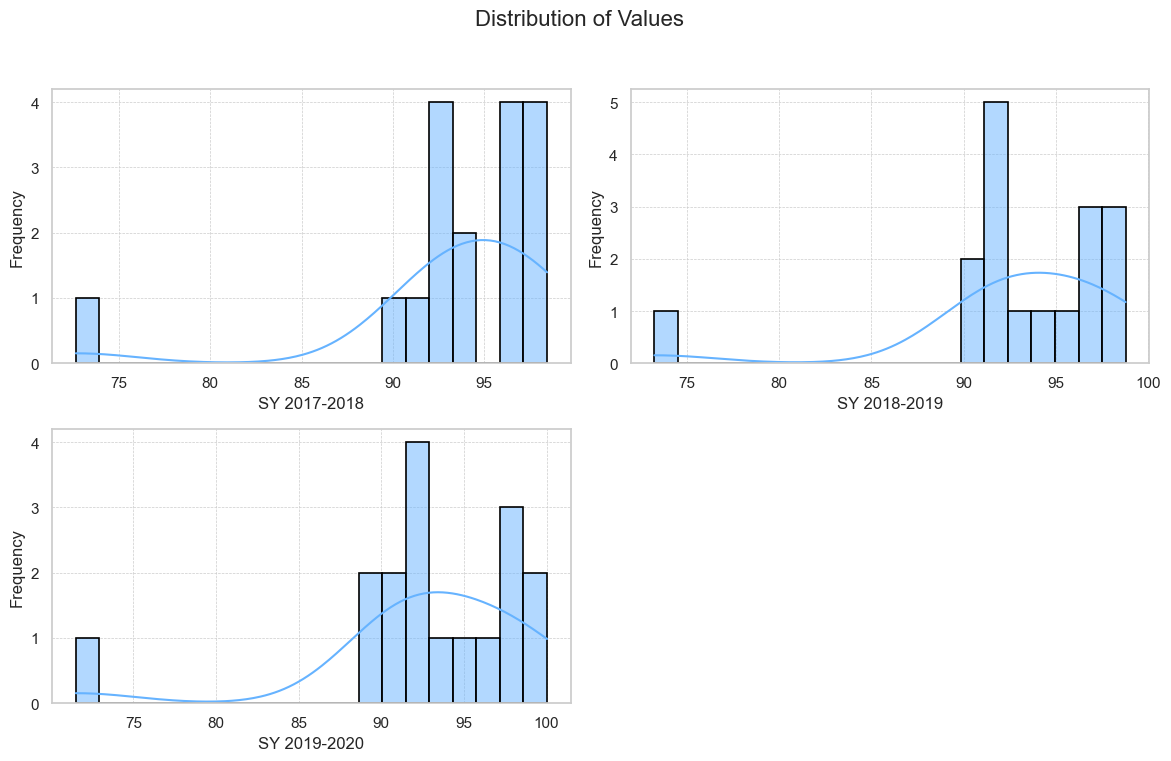

In [41]:
# Define the numerical variables
enrollment_rate_numerical_vars = ['SY 2017-2018', 'SY 2018-2019', 'SY 2019-2020']

# Create subplots for each variable
num_plots = len(enrollment_rate_numerical_vars)
cols = 2  # Number of columns in subplot grid
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Flatten axes array to iterate over it
axes = axes.flatten()

# Define a lighter blue color
color = '#66b3ff'

# Iterate over numerical variables and plot histograms with KDE curves
for i, var in enumerate(enrollment_rate_numerical_vars):
    ax = axes[i]
    sns.histplot(df_enrollment_rate[var].dropna(), bins=20, kde=True, color=color, edgecolor='black', linewidth=1.2, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', linewidth=0.5)  # Add grid lines with enhanced visibility

# Hide empty subplots
for j in range(num_plots, rows * cols):
    axes[j].axis('off')

# Add a single title to the uppermost subplot
plt.suptitle("Distribution of Values", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

### Data Cleaning

#### Handling Missing Values

In [42]:
enrollment_rate_missing_values = df_enrollment_rate.isnull().sum()
print("Missing Values:")
print(enrollment_rate_missing_values)

Missing Values:
Region          0
SY 2017-2018    0
SY 2018-2019    0
SY 2019-2020    0
SY 2020-2021    0
dtype: int64


#### Handling Duplicates

In [43]:
#Checking for duplicates in the columns
enrollment_rate_duplicate_columns = df_enrollment_rate.columns[df_enrollment_rate.columns.duplicated()]

# Print duplicate columns, if any
if len(enrollment_rate_duplicate_columns) > 0:
    print("Duplicate Columns:", enrollment_rate_duplicate_columns)
else:
    print("No duplicate columns found.")

No duplicate columns found.


#### Handling Outliers

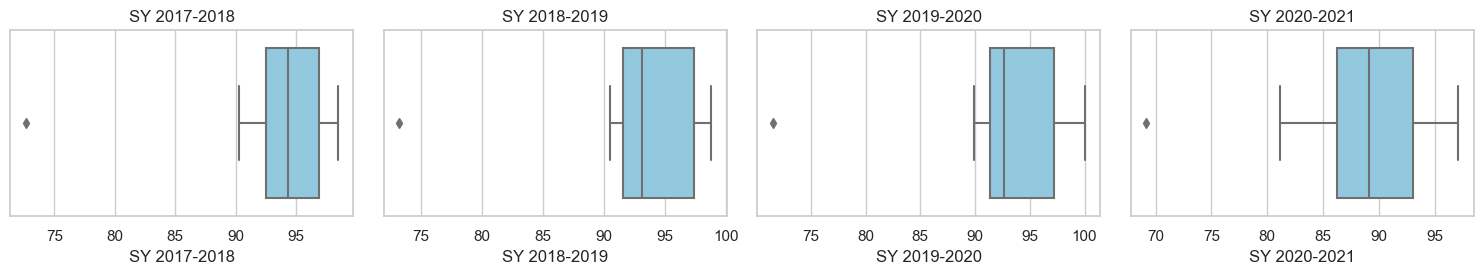

In [44]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select numerical columns for visualization
enrollment_rate_numerical_cols = ['SY 2017-2018', 'SY 2018-2019', 'SY 2019-2020', 'SY 2020-2021']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(enrollment_rate_numerical_cols, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_enrollment_rate[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

---

### Feature Engineering

In [45]:
# Selecting only numerical columns
enrollment_rate_numerical_cols = ['SY 2017-2018', 'SY 2018-2019', 'SY 2019-2020', 'SY 2020-2021']

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_enrollment_rate_scaled = scaler.fit_transform(df_enrollment_rate[enrollment_rate_numerical_cols])

# Convert the scaled array back to a DataFrame
df_enrollment_rate_scaled = pd.DataFrame(df_enrollment_rate_scaled, columns=enrollment_rate_numerical_cols)

In [46]:
df_enrollment_rate_scaled.head()

,SY 2017-2018,SY 2018-2019,SY 2019-2020,SY 2020-2021
0,0.782339,0.739130,0.645161,0.429237
1,0.841983,0.744222,0.697405,0.657829
2,0.769558,0.675284,0.647966,0.610892
3,1.000000,0.925186,0.899719,0.876388
4,0.979086,1.000000,1.000000,0.940165


In [47]:
df_enrollment_rate_scaled.tail()

,SY 2017-2018,SY 2018-2019,SY 2019-2020,SY 2020-2021
12,0.921766,0.959264,0.971950,1.000000
13,0.939194,0.876224,0.784011,0.612684
14,0.744771,0.736389,0.726858,0.700824
15,0.900852,0.842146,0.818022,0.819420
16,0.000000,0.000000,0.000000,0.000000


In [48]:
df_enrollment_rate_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
SY 2017-2018,17.0,0.810475,0.230722,0.0,0.769558,0.841983,0.939194,1.0
SY 2018-2019,17.0,0.780005,0.230348,0.0,0.716412,0.778692,0.944771,1.0
SY 2019-2020,17.0,0.751403,0.227851,0.0,0.697405,0.742286,0.902525,1.0
SY 2020-2021,17.0,0.699707,0.231474,0.0,0.612684,0.713364,0.853458,1.0


---

### Exploratory Data Analysis (EDA)

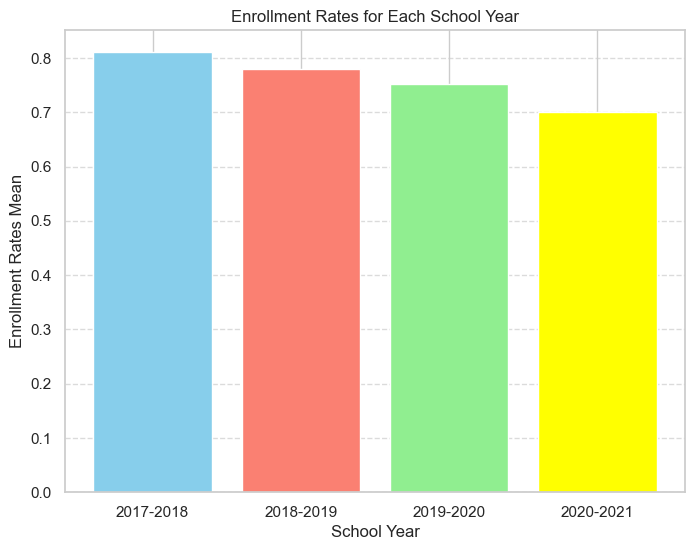

In [49]:
# Years
school_years = ['2017-2018', '2018-2019', '2019-2020', '2020-2021']

# Enrollment Rates Mean
enrollment_rate_mean = [0.810475, 0.780005, 0.751403, 0.699707]

# Colors for each year
colors = ['skyblue', 'salmon', 'lightgreen', 'yellow']

# Create bar plot with custom colors
plt.figure(figsize=(8, 6))
plt.bar(school_years, enrollment_rate_mean, color=colors)
plt.title('Enrollment Rates for Each School Year')
plt.xlabel('School Year')
plt.ylabel('Enrollment Rates Mean')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> The graph shows a decline in enrollment rates throughout the given school years, suggesting that fewer individuals are attending school.

In [55]:
# Calculate averages for the correct years
avg_enrollment_2018 = df_enrollment_rate_scaled[['SY 2017-2018', 'SY 2018-2019']].mean(axis=1)
avg_enrollment_2021 = df_enrollment_rate_scaled[['SY 2020-2021']].mean(axis=1)

# Create a new DataFrame excluding 2023
poverty_enrollment_rate_combined_df = pd.DataFrame({
    'Year': ['2018', '2021'],
    'Poverty_Threshold': [
        df_poverty_scaled['poverty_threshold_2018'].mean(),
        df_poverty_scaled['poverty_threshold_2021'].mean()
    ],
    'Enrollment_Rate': [
        avg_enrollment_2018.mean(),
        avg_enrollment_2021.mean()
    ]
})

# Display the combined dataframe
print(poverty_enrollment_rate_combined_df)

   Year  Poverty_Threshold  Enrollment_Rate
0  2018           0.306050         0.795240
1  2021           0.428012         0.699707


In [51]:
# Calculate correlation matrix
poverty_enrollment_rate_correlation_matrix = poverty_enrollment_rate_combined_df[['Poverty_Threshold', 'Enrollment_Rate']].corr()

# Print correlation matrix
print(poverty_enrollment_rate_correlation_matrix)

                   Poverty_Threshold  Enrollment_Rate
Poverty_Threshold                1.0             -1.0
Enrollment_Rate                 -1.0              1.0


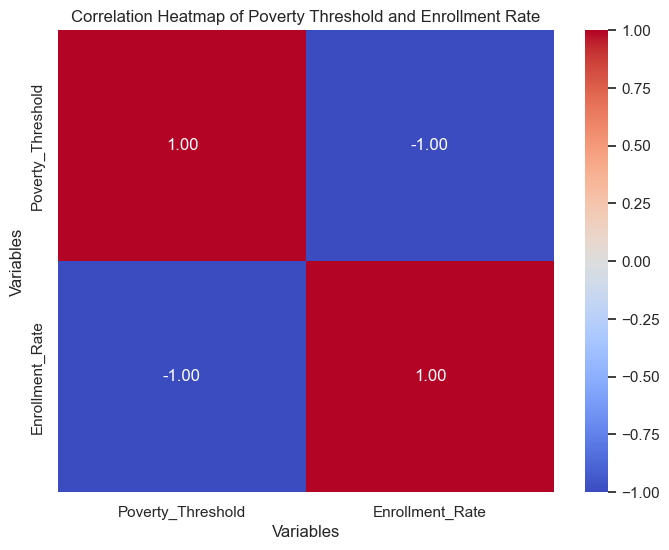

In [56]:
# Displaying correlation through a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(poverty_enrollment_rate_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Poverty Threshold and Enrollment Rate')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

> The perfect negative correlation suggests that as enrollment rates increases, poverty threshold decreases, while as enrollment rates decreases, poverty threshold increases. In other words, areas with higher enrollment rates tend to have lower poverty levels, and vice versa. 

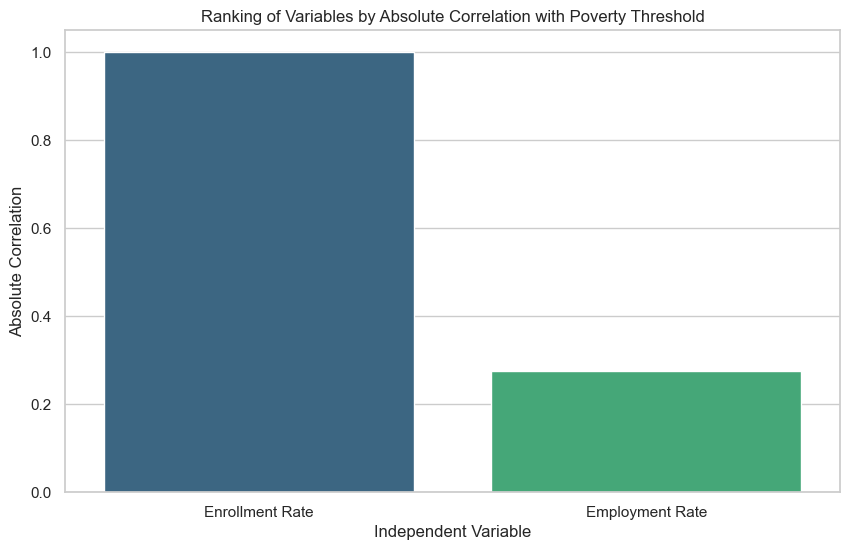

In [53]:
# Create a dictionary with the absolute correlation values
correlation_data = {
    'Variable': ['Enrollment Rate', 'Employment Rate'],
    'Absolute Correlation': [1.0, 0.274885]
}

# Create a DataFrame from the dictionary
correlation_df = pd.DataFrame(correlation_data)

# Sort the DataFrame by absolute correlation values in descending order
correlation_df = correlation_df.sort_values(by='Absolute Correlation', ascending=False)

# Plot the rankings
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Absolute Correlation', data=correlation_df, palette='viridis')
plt.title('Ranking of Variables by Absolute Correlation with Poverty Threshold')
plt.ylabel('Absolute Correlation')
plt.xlabel('Independent Variable')
plt.show()

> The graph shows that enrollment rate has a stronger inverse relationship with poverty threshold than the employment rate. This indicates that changes in educational enrollment rates have more influence on poverty levels than employment rates.

### Conclusion

In conclusion, <b> Enrollment Rate </b> has a stronger correlation with the poverty threshold. This implies that changes in the enrollment rate have a more potential impact on the poverty threshold than the changes in the employment rate, and shall be prioritized first to address poverty.

Through this analysis, we can determine which factors impact poverty levels in the Philippines, providing recommendations to policy makers to address problems of the country like poverty. However, it is also important to consider other factors aside from enrollment rate and employment rate to get a more comprehensive understanding of factors driving poverty. This analysis provides policymakers to adress education-related issues through initiatives, resource allocation, and strategical approaches that will improve the poverty condition in the Philippines. 